## Mean Shift Introduction

In [29]:
import pandas as pd
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets._samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    
import pickle





In [17]:
centers = [[1,1,1],[5,5,5],[3,10,10]]
x, _ = make_blobs(100,centers=centers, cluster_std=1)

In [18]:
model = MeanShift()
model.fit(x)

MeanShift()

In [20]:
labels = model.labels_
cluster_centers = model.cluster_centers_
print(cluster_centers)
n_clusters = len(np.unique(labels))
print(n_clusters)

[[0.64415913 0.87289051 1.15885651]
 [4.94917933 4.67008731 4.98353604]
 [2.78723481 9.93167591 9.89090901]]
3


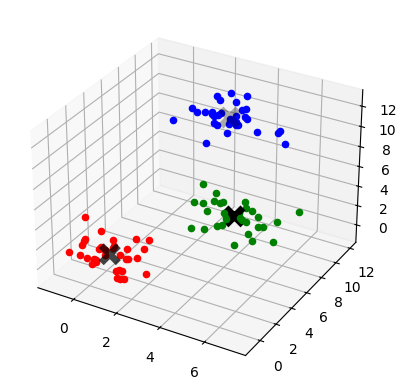

In [25]:
colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

for i in range(len(x)):
    ax.scatter(x[i][0],x[i][1],x[i][2],c=colors[labels[i]],marker='o')
ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],marker='x',color='k',s=150,linewidths=5,zorder=10)

plt.show()

In [47]:
# tatanic Sample

df = pd.read_excel('titanic.xls')
original_df = pd.DataFrame.copy(df)

df.drop(['name','body'],axis=1,inplace=True)
df.fillna(0,inplace=True)

def handle_categorical_data(df):
    columns = df.columns.values
    for column in columns:
        text_vals = {}
        def convert_to_int(val):
            return text_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_vals:
                    text_vals[unique] = x
                    x += 1
            
            df[column] = list(map(convert_to_int,df[column]))
            
    return df
            
            
            
    
df = handle_categorical_data(df)
df.drop(['ticket','home.dest'],axis=1,inplace=True)

In [55]:
x = np.array(df.drop('survived',axis=1))
#x = preprocessing.scale(x)
y = np.array(df['survived'])

model = MeanShift()
model.fit(x)

MeanShift()

In [56]:
labels = model.labels_
cluster_centers = model.cluster_centers_

original_df['cluster_group'] = np.nan
for i in range(len(x)):
    original_df['cluster_group'] = labels[i]

print(original_df['cluster_group'])
print(original_df.describe())
survival_rates = {}
n_clusters_ = len(np.unique(labels))

for i in range(n_clusters_):
    temp_df = original_df[ (original_df['cluster_group'] == i) ]
    survival_cluster = temp_df[ (temp_df['survived'] == 1) ]
    print(i)
    survival_rate = len(survival_cluster) / len(temp_df)
    survival_rates[i] = survival_rate
print(survival_rates)

0       0
1       0
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: cluster_group, Length: 1309, dtype: int64
            pclass     survived          age        sibsp        parch   
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000  \
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  cluster_group  
count  1308.000000  121.000000         1309.0  
mean     33.295479  160.809917            0.0  
std      51.758668   97.696922 

ZeroDivisionError: division by zero